### 1 K-Means, Accelerated K-Means with triangle-inequality, GMM-EM from scratch

In [1]:
import numpy as np
import pandas as pd

# already adjusted some indention errors in the txt file by hand
data = pd.read_csv("seeds_dataset.txt",
                   sep="\t",
                   header=None, 
                   names=["Area", "Perimeter", "Compactness", "Length of Kernel",
                          "Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])
X = data.drop(columns="Label").values
y = data.Label.values
data

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [14]:
def cal_euclidean(xi, xj):
    return np.sqrt(np.sum((xi-xj) ** 2))

def k_means(data, k):
    iter = 0
    centers = {}
    n = len(data)

    # Initialization: Randomly pick k points as centers
    random_index = np.random.choice(range(n), size=k, replace=False)
    for i in range(k):
        centers[i] = data[random_index[i]]

    # Repeat until convergence
    old_centers = {}
    is_converge = False
    while is_converge == False:
        # clusters =  {0: [data1, data3, ...], 1: [data2, data5, ...], 2: [data4,  ...] }
        clusters = {}
        for i in range(k):
            clusters[i] = []
        
        # 1. Assignment: Given cluster centers, update the assignments
        # c_x is the cluster number of data x
        c_x = [0 for _ in range(n)]
        for i in range(n):
            distances = []
            for c in range(k):
                distances.append(cal_euclidean(centers[c], data[i]))
            argmin = np.argmin(distances)
            clusters[argmin].append(data[i])
            c_x[i] = argmin

        old_centers = centers.copy()

        # 2. Refitting: Given the assignment, update the cluster centers
        for c in range(k):
            centers[c] = np.mean(clusters[c], axis=0)

        # check convergence
        for c in range(k):
            if (cal_euclidean(old_centers[c], centers[c]) > 1e-8):
                is_converge = False
                break
            # converge if the cluster centers do not change
            is_converge = True

        iter += 1
    
    labels_pred = c_x
    return centers, clusters, labels_pred, iter

In [15]:
np.random.seed(0)
k_centers, k_clusters, k_labels_pred, k_iter = k_means(X, 3)
print("K-Means")
print('centers:\n', k_centers)
print('predicted labels:\n',k_labels_pred)

K-Means
centers:
 {0: array([11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
        4.75974026,  5.08851948]), 1: array([18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
        3.60359016,  6.06609836]), 2: array([14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
        2.64893333,  5.19231944])}
predicted labels:
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]


In [16]:
# accelerated K-means with triangle-inequality
def acc_k_means(data, k):
    centers = {}
    n_datas = len(data)

    # Initialization: Randomly pick k points as centers
    random_index = np.random.choice(range(n_datas), size=k, replace=False)
    for i in range(k):
        centers[i] = data[random_index[i]]
    
    # N*k matrix to store the lower bound
    lower = np.zeros((n_datas,k))
    # N*1 list to store the upper bound
    upper = np.zeros(n_datas)

    # compute the distances between the centers d(c,c')
    cen_distance = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            cen_distance[i][j] = cal_euclidean(centers[i],centers[j])

    # First assignment: Assign each x to its closest initial center
    clusters = {}
    for i in range(k):
            clusters[i] = []
    c_x = [0 for _ in range(n_datas)]

    for i in range(n_datas):
        distances = {}
        current_c = 0
        for c in centers.keys():
            # use Lamma 1 to avoid redundant distance
            if c == 0 or cen_distance[current_c][c] < 2*d_x_c:
                d_x_c = cal_euclidean(centers[c], data[i])
                lower[i][c] = d_x_c
                distances[c] = d_x_c
                current_c = c
        
        argmin = min(distances, key=distances.get)
        upper[i] = distances[argmin]
        c_x[i] = int(argmin)
        clusters[argmin].append(data[i])
    
    # Next, repeat until convergence
    old_centers = {}
    is_converge = False
    r_x = [False for _ in range(n_datas)]
    iter = 0
    while is_converge == False:
        clusters = {}
        for i in range(k):
            clusters[i] = []
        # 1
        # compute the distances between the centers d(c,c')
        cen_distance = np.zeros((k,k))
        for i in range(k):
            for j in range(k):
                cen_distance[i][j] = cal_euclidean(centers[i],centers[j])

        # compute s(c)
        s = np.zeros(k)
        for c in range(k):
            s[c] = 1/2 * np.min(cen_distance[c][np.nonzero(cen_distance[c])])
        
        # 2. Identify points s.t. u(x)>s(c(x))
        idx = [i for i in range(n_datas) if upper[i] > s[c_x[i]]]

        # 3. For the points in 2
        for i in idx:
            for c in range(k):
                # (i)&(ii)&(iii)
                if c != c_x[i] and upper[i]>lower[i][c] and upper[i]>1/2*cen_distance[c_x[i],c]:
                    # 3a
                    if r_x[i] == True:
                        # if r(x), compute d(x,c(x))
                        d_x_cx = cal_euclidean(data[i], centers[c_x[i]])
                        # update the upper bound u(x)=d(x,c(x)) whenever d(x,c(x)) is computed
                        upper[i] = d_x_cx
                        r_x[i] = False
                    else:
                        d_x_cx = upper[i]
                    
                    # 3b
                    if d_x_cx > lower[i][c] or d_x_cx > 1/2*cen_distance[c_x[i],c]:
                        # compute d(x,c)
                        d_x_c = cal_euclidean(data[i],centers[c])
                        # update the lower bound l(x,c)=d(x,c) whenever d(x,c) is computed
                        lower[i][c] = d_x_c
                        if d_x_c < d_x_cx:
                            c_x[i] = c

        # 4
        # add each point to the corresponding cluster c(x)
        for i in range(n_datas):
            clusters[c_x[i]].append(data[i])

        # recompute the centers
        old_centers = centers.copy()
        for idx in clusters.keys():
            centers[idx] = np.mean(clusters[idx], axis=0)

        # 5
        # compute the distances between the new_centers and old_centers
        c_mc_distance = np.zeros(k)
        for c in range(k):
            c_mc_distance[c] = cal_euclidean(old_centers[c],centers[c])

        # assign lower bound
        for i in range(n_datas):
            for c in range(k):
                lower[i][c] = np.maximum(lower[i][c]-c_mc_distance[c],0)

        # 6
        # assign upper bound & r(x)
        for i in range(n_datas):
            upper[i] = upper[i] + c_mc_distance[c_x[i]]
            r_x[i] = True
        
        # check convergence
        for idx in centers.keys():
            if (cal_euclidean(old_centers[idx], centers[idx]) > 1e-8):
                is_converge = False
                break
            # converge if the cluster centers do not change
            is_converge = True

        iter += 1

    labels_pred = c_x
    return centers, clusters, labels_pred, iter

In [30]:
np.random.seed(0) 
acc_centers, acc_clusters, acc_labels_pred, acc_iter= acc_k_means(X, 3)
print("Accelerated K-Means")
print('centers:\n', acc_centers)
print('predicted labels:\n',acc_labels_pred)

Accelerated K-Means
centers:
 {0: array([11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
        4.75974026,  5.08851948]), 1: array([18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
        3.60359016,  6.06609836]), 2: array([14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
        2.64893333,  5.19231944])}
predicted labels:
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0

In [31]:
[acc_centers[i] == k_centers[i] for i in range(len(acc_centers))]

[array([ True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True])]

In [32]:
from scipy.stats import multivariate_normal

class GMM:
    def __init__(self, k):
        self.k = k
        

    def initialize(self, X):
        # initialize the means mu, covariances sigma, mixing coefficients pi
        self.shape = X.shape
        self.n, self.d = self.shape
        self.pi = np.full(shape=self.k, fill_value=1/self.k)
        self.gamma = np.full(shape=self.shape, fill_value=1/self.k)
        # randomly pick k points as centers
        random_center = np.random.randint(low=0, high=self.n, size=self.k)
        self.mu = [X[i] for i in random_center ]
        self.sigma = [np.cov(X.T) for _ in range(self.k) ]

    # gamma = p(z|x)
    def cal_gamma(self, X):
        # prob is x's distribution, which is N(x|mu,sigma)
        prob = np.zeros((self.n, self.k))
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            prob[:,i] = distribution.pdf(X)
        
        numerator = prob * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        gamma = numerator / denominator
        return gamma

    # E-step: evaluate the responsibilities given mu, sigma, pi
    def e_step(self, X):
        self.gamma = self.cal_gamma(X)
        
    # M-step: re-estimate mu, sigma, pi given gamma
    def m_step(self, X):
        for i in range(self.k):
            gamma_k = self.gamma[:, [i]]
            N_k = gamma_k.sum()
            self.mu[i] = (X * gamma_k).sum(axis=0) / N_k
            self.sigma[i] = np.cov(X.T, 
                aweights=(gamma_k/N_k).flatten(), 
                bias=True)
            self.pi = self.gamma.mean(axis=0)

    # compute log likelihood ln(p(X|pi,mu,sigma))
    def get_likelihood(self,X):
        prob = np.zeros((self.n, self.k))
        for i in range(self.k):
            distribution = multivariate_normal(
                mean=self.mu[i], 
                cov=self.sigma[i])
            prob[:,i] = distribution.pdf(X)
        numerator = prob * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        likelihood = sum(np.log(denominator))
        return likelihood

    # repeat e-step and m-step until convergence
    def fit(self, X):
        self.initialize(X)
        is_converge = False
        old_likelihood = 0
        self.iter = 0
        while is_converge == False:
            self.e_step(X)
            self.m_step(X)
            likelihood = self.get_likelihood(X)
            if abs(likelihood-old_likelihood) <= 1e-8:
                # converge if the log likelihood does not change
                is_converge = True
            old_likelihood = likelihood
            self.iter += 1
    
    # predict the label k as the one with highest probability p(z=k|x)
    def get_labels(self, X):
        gamma = self.cal_gamma(X)
        return np.argmax(gamma, axis=1)
    
    # get the total number iterations
    def get_iter(self):
        return self.iter
    


In [34]:
np.random.seed(0) 
gmm = GMM(k=3)
gmm.fit(X)
gmm_labels_pred = gmm.get_labels(X)
gmm_labels_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### 2 Silhouette Coefficient & Rand Index from scratch

In [36]:
def silhouette_coef(data, result_list):
    n = len(data)
    k = len(set(result_list))

    # get the clusters with the points
    clusters = {}
    for i in range(k):
            clusters[i] = []
    for i in range(n):
        c = result_list[i]
        clusters[c].append(data[i])

    s_list = []
    for i in range(n):
        # for each data xi, get its cluster c
        c = result_list[i]
        n_c = len(clusters[c])

        # compute a: mean distance between a point and all other points in the same cluster
        a_list = []
        for point in clusters[c]:
            dis = cal_euclidean(point,data[i])
            a_list.append(dis)
        a = np.mean(a_list)*n_c/(n_c-1)

        # compute b: mean distance between a point and all other points in the next nearest cluster
        b_list = []
        for j in range(k):
            if j!=c:
                b_dis_list = []
                for point in clusters[j]:
                    dis = cal_euclidean(point,data[i])
                    b_dis_list.append(dis)
                b_dis = np.mean(b_dis_list)
                b_list.append(b_dis)
        b = np.min(b_list)

        # silhouette coefficient s for one point
        s = (b-a)/np.maximum(a,b)
        s_list.append(s)

    # silhouette coefficient s for n points
    return np.mean(s_list)


In [38]:
print('Silhouette Coefficient for model:')
print('K-Means', silhouette_coef(X,k_labels_pred))
print('Accelerated K-Means', silhouette_coef(X,acc_labels_pred))
print('GMM-EM', silhouette_coef(X,gmm_labels_pred))

Silhouette Coefficient for model:
K-Means 0.4719337319126895
Accelerated K-Means 0.4719337319126895
GMM-EM 0.4376823626336355


In [40]:
from itertools import combinations

def rand_index(labels_true, labels_pred):
    n = len(labels_true)
    a = 0
    b = 0
    pairs = list(combinations(range(n), 2))
    for i,j in pairs:
        if labels_true[i] == labels_true[j] and labels_pred[i] == labels_pred[j]:
            a+=1
        if labels_true[i] != labels_true[j] and labels_pred[i] != labels_pred[j]:
            b+=1
    return (a+b)/(n*(n-1)/2)


In [41]:
print('Rand Index for model:')
print('K-Means', rand_index(y, k_labels_pred))
print('Accelerated K-Means', rand_index(y, acc_labels_pred))
print('GMM-EM', rand_index(y, gmm_labels_pred))

Rand Index for model:
K-Means 0.8743677375256322
Accelerated K-Means 0.8743677375256322
GMM-EM 0.8997038049669629


### 4 Analyze the sensitivity

In [42]:
import time

silhouette_k_means = []
silhouette_acc_k_means = []
silhouette_gmm = []

rand_k_means = []
rand_acc_k_means = []
rand_gmm = []

iter_k_means = []
iter_acc_k_means = []
iter_gmm = []

time_k_means = []
time_acc_k_means = []
time_gmm = []

# set the random seed from 19 to 99
for i in range(19,100):
    # K Means
    np.random.seed(i) 
    start = time.time()
    k_centers, k_clusters, k_labels_pred, k_iter = k_means(X, 3)
    end = time.time()
    time_k_means.append(end-start)

    # Accelerated K Means
    np.random.seed(i) 
    start = time.time()
    acc_centers, acc_clusters, acc_labels_pred, acc_iter= acc_k_means(X, 3)
    end = time.time()
    time_acc_k_means.append(end-start)
    
    # GMM-EM
    np.random.seed(i) 
    start = time.time()
    gmm = GMM(k=3)
    gmm.fit(X)
    gmm_labels_pred = gmm.get_labels(X)
    gmm_iter = gmm.get_iter()
    end = time.time()
    time_gmm.append(end-start)

    silhouette_k_means.append(silhouette_coef(X,k_labels_pred))
    silhouette_acc_k_means.append(silhouette_coef(X,acc_labels_pred))
    silhouette_gmm.append(silhouette_coef(X,gmm_labels_pred))

    rand_k_means.append(rand_index(y, k_labels_pred))
    rand_acc_k_means.append(rand_index(y, acc_labels_pred))
    rand_gmm.append(rand_index(y, gmm_labels_pred))

    iter_k_means.append(k_iter)
    iter_acc_k_means.append(acc_iter)
    iter_gmm.append(gmm_iter)

variance of Silhouette Coefficient using
K-Means:  3.585003031722762e-06
Accelerated K-Means:  3.585003031722762e-06
GMM-EM:  0.005348251630649848


<Figure size 432x288 with 0 Axes>

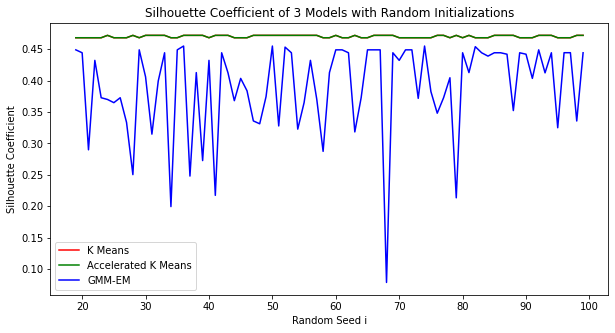

In [43]:
import matplotlib.pyplot as plt 

random_seed= [i for i in range(19,100)]

plt.figure(0)
plt.figure(figsize=(10,5))
l1=plt.plot(random_seed,silhouette_k_means,'r',label='K Means')
l2=plt.plot(random_seed,silhouette_acc_k_means,'g',label='Accelerated K Means')
l3=plt.plot(random_seed,silhouette_gmm,'b',label='GMM-EM')
plt.title('Silhouette Coefficient of 3 Models with Random Initializations')
plt.xlabel('Random Seed i')
plt.ylabel('Silhouette Coefficient')
plt.legend()

print('variance of Silhouette Coefficient using')
print('K-Means: ',np.var(silhouette_k_means))
print('Accelerated K-Means: ',np.var(silhouette_acc_k_means))
print('GMM-EM: ',np.var(silhouette_gmm))


variance of Rand Index using
K-Means:  2.34674407587078e-06
Accelerated K-Means:  2.34674407587078e-06
GMM-EM:  0.004967464153572386


<Figure size 432x288 with 0 Axes>

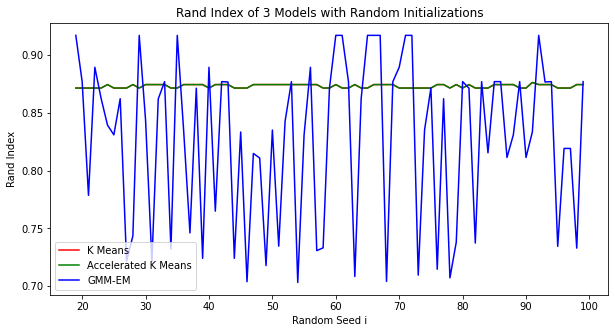

In [45]:
plt.figure(1)
plt.figure(figsize=(10,5))
l1=plt.plot(random_seed,rand_k_means,'r',label='K Means')
l2=plt.plot(random_seed,rand_acc_k_means,'g',label='Accelerated K Means')
l3=plt.plot(random_seed,rand_gmm,'b',label='GMM-EM')
plt.title('Rand Index of 3 Models with Random Initializations')
plt.xlabel('Random Seed i')
plt.ylabel('Rand Index')
plt.legend(loc='lower left')

print('variance of Rand Index using')
print('K-Means: ',np.var(rand_k_means))
print('Accelerated K-Means: ',np.var(rand_acc_k_means))
print('GMM-EM: ',np.var(rand_gmm))

### 5 Numbers of iterations and running time of each algorithm

average number of iterations using
K-Means:  8.592592592592593
Accelerated K-Means:  8.580246913580247
GMM-EM:  65.58024691358025


<Figure size 432x288 with 0 Axes>

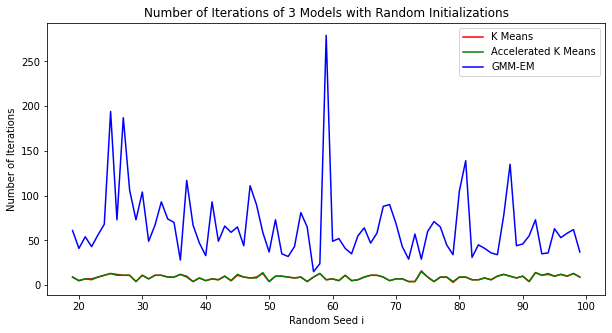

In [47]:
plt.figure(2)
plt.figure(figsize=(10,5))
l1=plt.plot(random_seed,iter_k_means,'r',label='K Means')
l2=plt.plot(random_seed,iter_acc_k_means,'g',label='Accelerated K Means')
l3=plt.plot(random_seed,iter_gmm,'b',label='GMM-EM')
plt.title('Number of Iterations of 3 Models with Random Initializations')
plt.xlabel('Random Seed i')
plt.ylabel('Number of Iterations')
plt.legend(loc='upper right')

print('average number of iterations using')
print('K-Means: ',np.mean(iter_k_means))
print('Accelerated K-Means: ',np.mean(iter_acc_k_means))
print('GMM-EM: ',np.mean(iter_gmm))

average running time using
K-Means:  0.05996787695237148
Accelerated K-Means:  0.030372707932083694
GMM-EM:  0.12339384467513473


<Figure size 432x288 with 0 Axes>

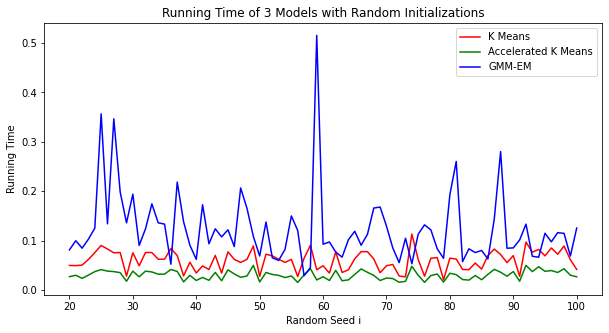

In [670]:
plt.figure(3)
plt.figure(figsize=(10,5))
l1=plt.plot(random_seed,time_k_means,'r',label='K Means')
l2=plt.plot(random_seed,time_acc_k_means,'g',label='Accelerated K Means')
l3=plt.plot(random_seed,time_gmm,'b',label='GMM-EM')
plt.title('Running Time of 3 Models with Random Initializations')
plt.xlabel('Random Seed i')
plt.ylabel('Running Time')
plt.legend(loc='upper right')

print('average running time using')
print('K-Means: ',np.mean(time_k_means))
print('Accelerated K-Means: ',np.mean(time_acc_k_means))
print('GMM-EM: ',np.mean(time_gmm))